In [16]:
import os

from matplotlib import pyplot as plt
import numpy as np

from analysis.utils import plot_mat
from lib.dataset.hico_hake import HicoHake
from lib.dataset.utils import Splits

os.chdir('/home/alex/PartHOIZS')

hh = HicoHake()
split = Splits.TRAIN
# split = Splits.TEST

inters = hh.split_annotations[split]
actions = np.minimum(1, inters @ hh.interaction_to_action_mat)

/home/alex/anaconda3/envs/kbvrd_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/alex/anaconda3/envs/kbvrd_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


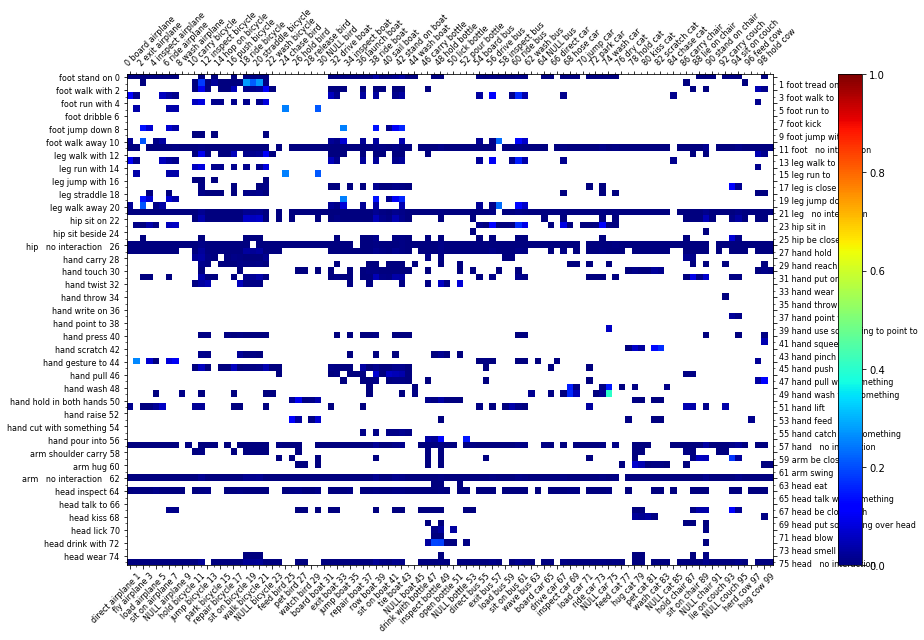

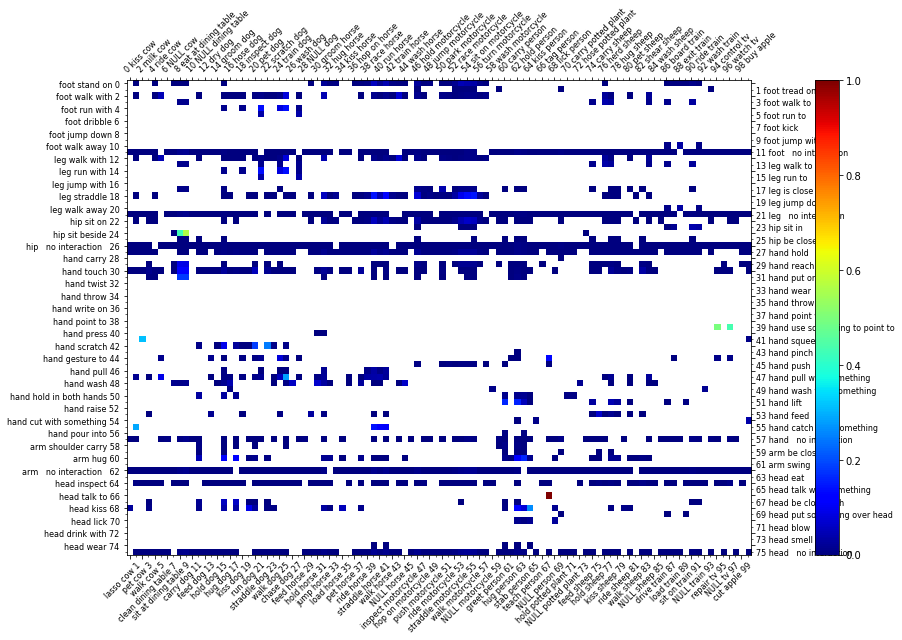

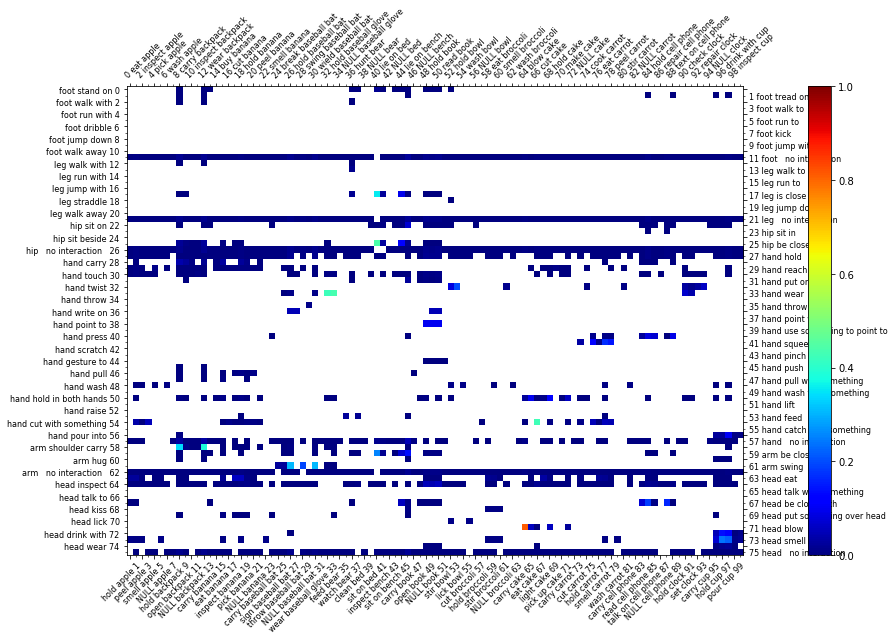

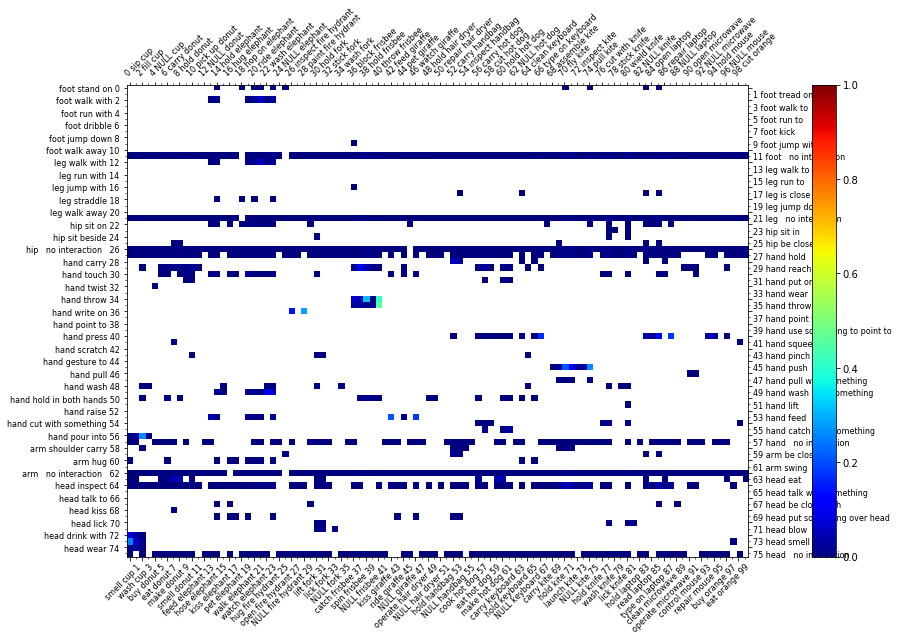

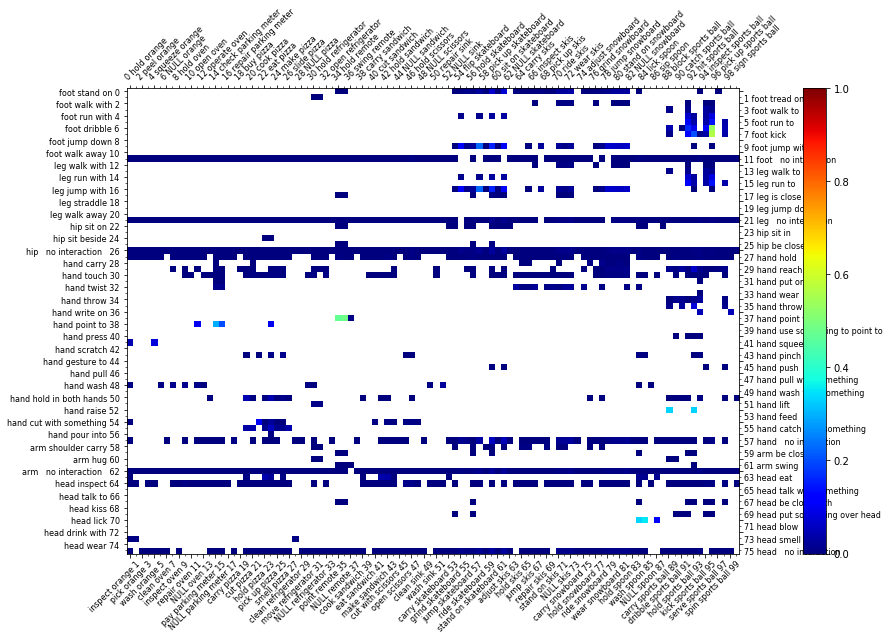

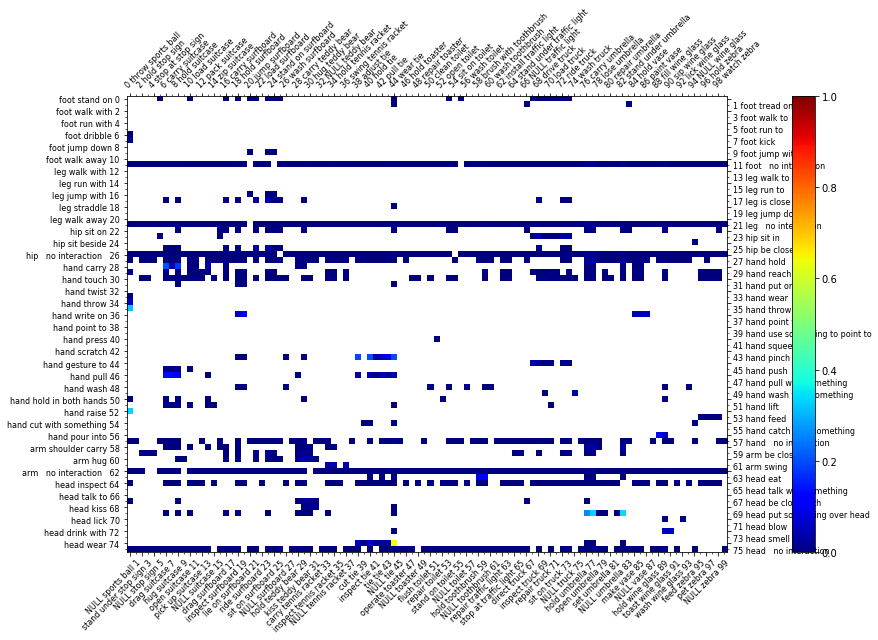

In [8]:
part_actions = hh.split_part_annotations[split]

pstate_inters_cooccs = part_actions.T @ inters
pstate_inters_cooccs /= pstate_inters_cooccs.sum(axis=1, keepdims=True)

inter_strs = [f'{hh.actions[a] if a > 0 else "NULL"} {hh.objects[o]}' 
              for a, o in hh.interactions]
part_action_strs = [f'{p} {a}'
                    for p, a in hh.part_actions_pairs]

for i in range(6):
    plot_mat(pstate_inters_cooccs[:, i*100:(i+1)*100], 
             xticklabels=inter_strs[i*100:(i+1)*100], 
             yticklabels=part_action_strs,
             zero_color=[1, 1, 1])
    

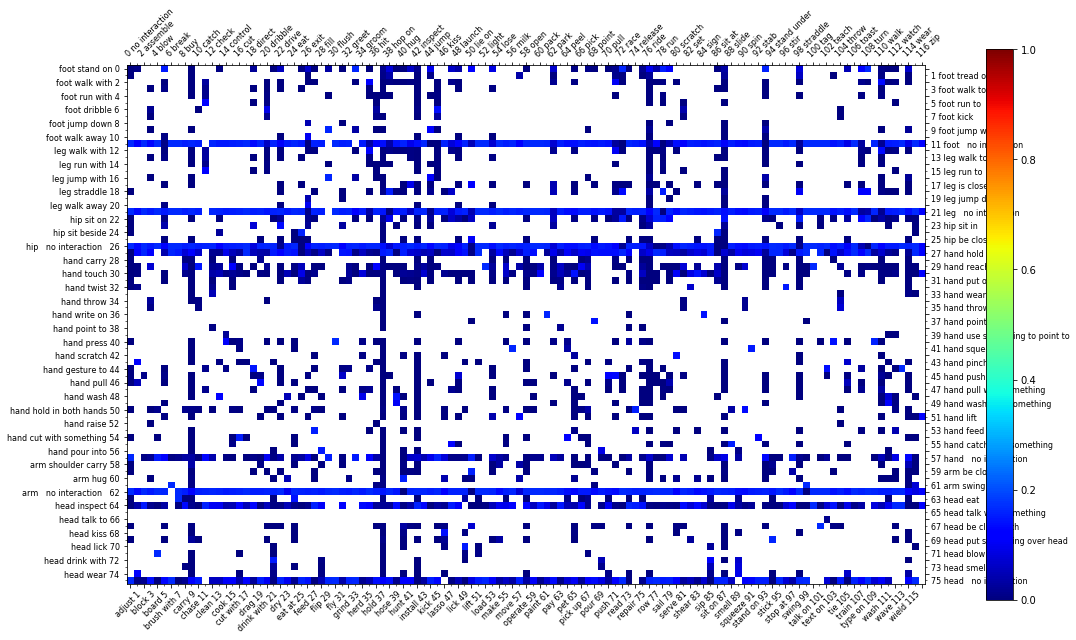

In [5]:
part_actions = hh.split_part_annotations[split]

part_actions_actions_cooccs = part_actions.T @ actions
part_actions_actions_cooccs /= part_actions_actions_cooccs.sum(axis=0, keepdims=True)

part_action_strs = [f'{p} {a}'
                    for p, a in hh.part_actions_pairs]

plot_mat(part_actions_actions_cooccs, 
         xticklabels=hh.actions, 
         yticklabels=part_action_strs,
         zero_color=[1, 1, 1])

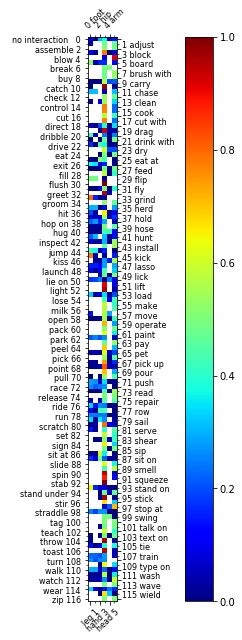

In [7]:
part_actions = hh.split_part_annotations[split]
parts = np.stack([part_actions[:, inds[:-1]].any(axis=1) 
                  for inds in hh.actions_per_part], 
                 axis=1)

part_actions_cooccs = parts.T @ actions
part_actions_cooccs /= part_actions_cooccs.sum(axis=0, keepdims=True)

plot_mat(part_actions_cooccs.T, 
         yticklabels=hh.actions, 
         xticklabels=hh.parts,
         zero_color=[1, 1, 1])
    

(array([ 4241,     0,     0, 33611,     0,     0,   261,     0,     0,
           3]), array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]))


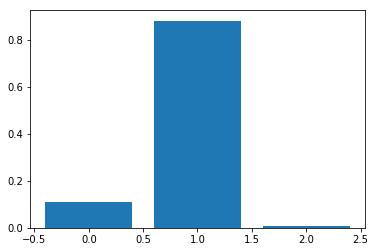

In [17]:
null_interactions = (hh.interactions[:, 0] == 0)
i2o_mat = hh.interaction_to_object_mat[~null_interactions, :]
# objs = inters @ i2o_mat
objs = np.minimum(1, inters[:, ~null_interactions] @ i2o_mat)

num_objs_per_img = objs.sum(axis=1)
print(np.histogram(num_objs_per_img))

plt.hist(num_objs_per_img, bins=np.unique(num_objs_per_img), 
         rwidth=0.8, align='left', density=True)
plt.show()

